# Credit Card Customer Churn Prediction

# 1. Problem definition & Data Reading

- classification problem (prediction whether the customer stayed (0) or exited (1) the bank)
- given the related features (e.g. credit score, balance, number of products)

In [1]:
import os
import sys

import IPython
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
from IPython.display import HTML, display
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from IPython.display import Image
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
%matplotlib inline
pd.set_option("display.max_colwidth", 200)

In [2]:
df = pd.read_csv('data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Dropping unnecessary columns
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# 2. Data splitting

In [8]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)


In [9]:
train_df.shape

(7000, 11)

# 3. EDA

## 3.1 Training data at a glance

In [10]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 3144 to 3582
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7000 non-null   int64  
 1   Geography        7000 non-null   object 
 2   Gender           7000 non-null   object 
 3   Age              7000 non-null   int64  
 4   Tenure           7000 non-null   int64  
 5   Balance          7000 non-null   float64
 6   NumOfProducts    7000 non-null   int64  
 7   HasCrCard        7000 non-null   int64  
 8   IsActiveMember   7000 non-null   int64  
 9   EstimatedSalary  7000 non-null   float64
 10  Exited           7000 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 656.2+ KB


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,650.144571,38.942571,5.020143,76448.489407,1.534429,0.705429,0.515286,99934.226306,0.204571
std,96.554892,10.612389,2.894639,62700.899244,0.582855,0.455882,0.499802,57555.469387,0.403417
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,583.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50743.832500,0.000000
50%,652.000000,37.000000,5.000000,96889.925000,1.000000,1.000000,1.000000,99729.890000,0.000000
75%,717.000000,44.000000,8.000000,127838.535000,2.000000,1.000000,1.000000,149458.040000,0.000000
max,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000


## 3.2 Label Imbalance

In [11]:
train_df["Exited"].value_counts(normalize=True)


0    0.795429
1    0.204571
Name: Exited, dtype: float64

We have a class imbalance. Both classes seem importance here.

We will be going to use macro-average f1 score as our evaluation metric.

## 3.3 separating class label & features

In [12]:
X_train, y_train = (
    train_df.drop(columns=["Exited"]),
    train_df["Exited"],
)
X_test, y_test = (
    test_df.drop(columns=["Exited"]),
    test_df["Exited"],
)

## 3.4 Correlation Plot

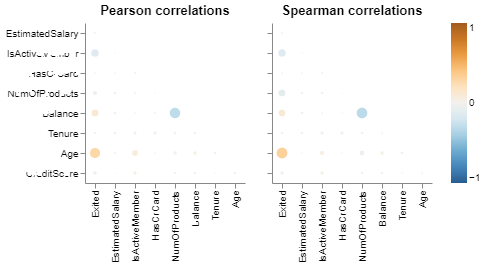

In [13]:
import altair_ally as aly
from altair_data_server import data_server

aly.alt.data_transformers.enable('data_server')
aly.alt.renderers.enable('mimetype')

aly.corr(train_df)

In [15]:
train_df.corr('spearman').style.background_gradient()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.006407,0.004991,0.012883,0.012178,0.000098,0.027965,-0.000284,-0.028045
Age,0.006407,1.000000,-0.015025,0.032517,-0.055963,0.004114,0.043716,-0.003896,0.318281
Tenure,0.004991,-0.015025,1.000000,-0.007421,0.017971,0.022227,-0.023151,0.014469,-0.013372
Balance,0.012883,0.032517,-0.007421,1.000000,-0.310379,-0.003376,-0.005624,0.016952,0.114544
NumOfProducts,0.012178,-0.055963,0.017971,-0.310379,1.000000,-0.002624,0.015832,0.012755,-0.117231
HasCrCard,0.000098,0.004114,0.022227,-0.003376,-0.002624,1.000000,-0.009708,-0.005103,0.006080
IsActiveMember,0.027965,0.043716,-0.023151,-0.005624,0.015832,-0.009708,1.000000,-0.003058,-0.146605
EstimatedSalary,-0.000284,-0.003896,0.014469,0.016952,0.012755,-0.005103,-0.003058,1.000000,0.008461
Exited,-0.028045,0.318281,-0.013372,0.114544,-0.117231,0.006080,-0.146605,0.008461,1.000000


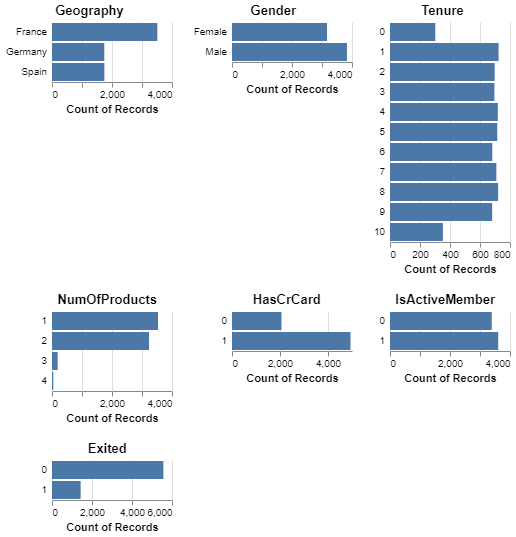

In [17]:
aly.dist(train_df[train_df.columns[train_df.nunique() <= 20]].astype('object'), dtype='object').resolve_scale(y='independent')
